In [1]:
!git clone https://github.com/Jwrede/neural_style_transfer.git
!pip install imageio-ffmpeg
%cd neural_style_transfer/

Cloning into 'neural_style_transfer'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 29 (delta 9), reused 12 (delta 5), pack-reused 12
Unpacking objects: 100% (29/29), done.
     |████████████████████████████████| 26.9MB 114kB/s 
/content/neural_style_transfer


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Style an image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


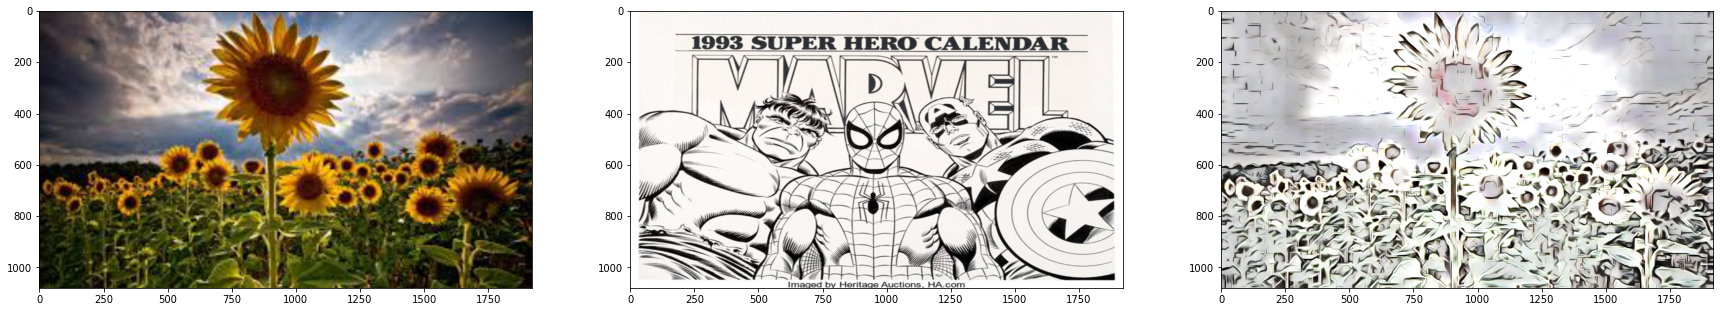

In [8]:
import matplotlib.pyplot as plt
from skimage import transform
from test import *
 
'''the content and style picture should have the same resolution'''
content = transform.resize(plt.imread("/content/drive/My Drive/content.jpg"), (1080,1920))
style = transform.resize(plt.imread("/content/drive/My Drive/style1.jpg"), content.shape)

'''
alpha regulates how much the style should influence the result picture
0 <= alpha <= 1

The preserve_color argument allows you to specify wether the result picture
should have the color scheme of the input image (True) or the style image (False)
'''

result = style_image(content, style, alpha = 1.0, preserve_color=False)

#Style interpolation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


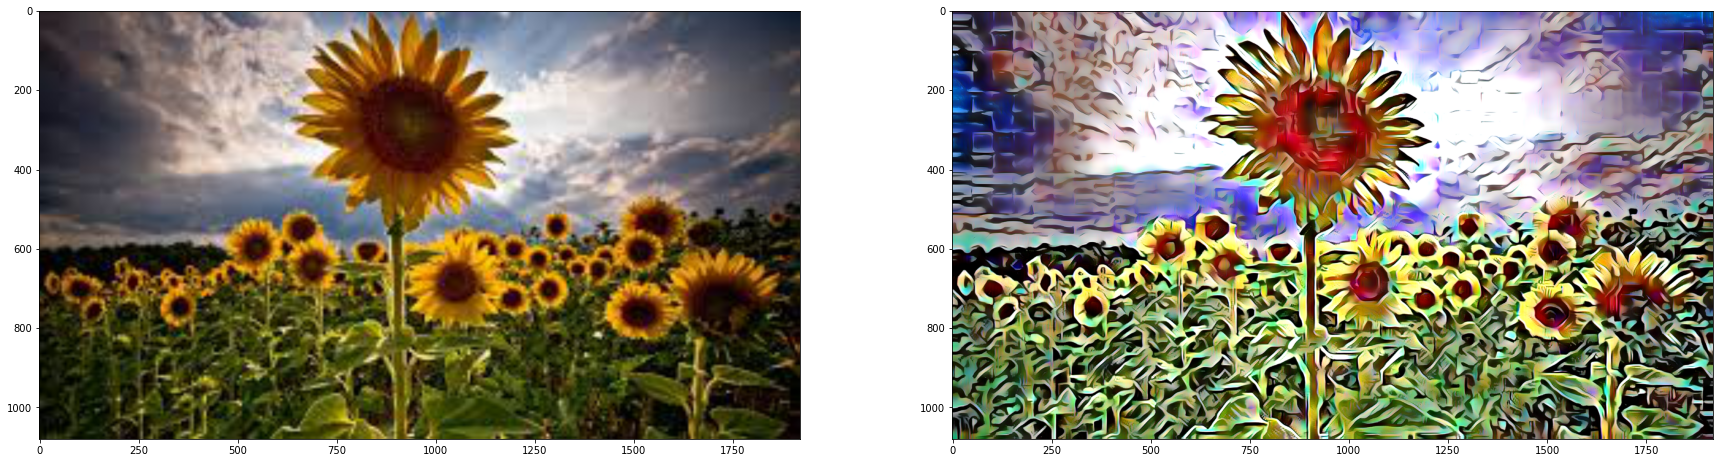

In [22]:
'''
styles is a list of all style images that the algorithm should interpolate,
they should all have the same resolution

example = [plt.imread("path_to_pic1"), plt.imread("path_to_pic2"), plt.imread("path_to_pic3")]

weights is a list that specifies how much weight each style image should have
while interpolating between the style images
weights should sum up to almost 1.0

example = [0.333, 0.333, 0.333] with 3 pictures that should have the same weight

alpha regulates how much the style should influence the result picture
0 <= alpha <= 1

The preserve_color argument allows you to specify wether the result picture
should have the color scheme of the input image (True) or the style image (False)
'''

styles = [transform.resize(plt.imread("/content/drive/My Drive/style1.jpg"), (1080,1920)), 
          transform.resize(plt.imread("/content/drive/My Drive/style2.jpg"), (1080,1920)), 
          transform.resize(plt.imread("/content/drive/My Drive/style3.jpg"), (1080,1920))]

weights = [0.333, 0.333, 0.333]

result = style_interpolation(content, styles, weights, alpha = 1.0, preserve_color=False)

#Save Result image

In [28]:
import matplotlib
from skimage import img_as_ubyte

matplotlib.image.imsave('../result.jpg', cv2.convertScaleAbs(result*255))

#Style Video

In [29]:
import io
import base64
from IPython.display import HTML

In [37]:
'''
The video doesn't need to have a specific resolution, you can specify the
output resolution with the arg custom_resolution

alpha regulates how much the style should influence the result picture
0 <= alpha <= 1

The preserve_color argument allows you to specify wether the result picture
should have the color scheme of the input image (True) or the style image (False)
'''

style_video("/content/drive/My Drive/video.mp4", 
            style, output_name= "../result", 
            alpha = 1.0, preserve_color=False, custom_resolution=(512,512))

path = "../result.mp4"

100%|██████████| 135/135 [00:19<00:00,  6.75it/s]


#Copy the input sound

In [48]:
!ffmpeg -i /content/drive/My\ Drive/video.mp4 -vn -acodec copy ../output_audio.aac
!ffmpeg -i ../result.mp4 -i ../output_audio.aac -c:v copy -c:a aac ../result_with_sound.mp4
!rm ../output_audio.aac
!rm ../result.mp4

path = "../result_with_sound.mp4"

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

#Output Video

In [50]:
video = io.open(path, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
<source src="data:video/mp4;base64,{0}" type="video/mp4" /> </video>'''.format(encoded.decode('ascii')))